# A minimal example of how to use DLITE

DLITE requires, as an input, the vertices and edges that connect them for a cell colony. This data structure is typically produced by tracing tools or some heuristically informed segmentation and skeletonization. Here we specify a tiny colony by hand in order to help gain intuition about what the input structure is for DLITE and how it is run. 

First we import the relevant libraries: 

In [1]:
from DLITE.cell_describe import node, edge, cell, colony
import matplotlib.pyplot as plt
%matplotlib inline

## A bit about the data structure

Each cell is composed of $n$ vertices, junctions, or nodes. Each node is connected to $m$ other nodes via edges. Each edge has two nodes, a maximum of two cells, and a radius of curvature. The edges have a clockwise orientation; that is if you stand an edge vertically such that its first node is on the top, it will always bulge to the left.

To demonstrate how DLITE and this data structure work, let's try and recreate the following hand-generated diagram.

![CellVertexGraph](img/cell_vertex_graph.png)

As above, the nodes are represented as $n_i$ and the edges as $m_{ij}$ with the right-hand-positive directionality of the radii of curvature. Cells are $c_k$. We'll manually create them now:

In [2]:
# Node xy locations taken from image,  
# radii are pretty random guesses

nodes = [node((  741,  681)), #n_1
         node(( 1443,  495)), #n_2
         node(( 1797,  537)), #n_3
         node((  408, 1098)), #n_4
         node(( 1011, 1170)), #n_5
         node(( 1467, 1209)), #n_6
         node((  777, 1539)), #n_7
         node(( 1470, 1623)), #n_8
         node(( 1548, 1404)), #n_9
         node(( 1851, 1377)), #n_10
         node(( 2214,  864)), #n_11
         node(( 2256,  243)), #n_12
         node(( 1434,   42)), #n_13
         node((  468,  357)), #n_14
         node((   39, 1089)), #n_15
         node((  117, 1530)), #n_16
         node((  870, 2106)), #n_17
         node(( 1965, 1965)), #n_18
         node(( 1929, 1740))] #n_19

edges = [edge(nodes[0],  nodes[3],  600), #m_1,4
         edge(nodes[4],  nodes[0], 1000), #m_5,1
         edge(nodes[6],  nodes[4],  600), #m_7,5
         edge(nodes[6],  nodes[3], 1000), #m_7,4
         edge(nodes[1],  nodes[0],  900), #m_2,1
         edge(nodes[1],  nodes[5], 2000), #m_2,6
         edge(nodes[5],  nodes[4], 1000), #m_6,5
         edge(nodes[2],  nodes[1], 1000), #m_3,2
         edge(nodes[9],  nodes[2], 2000), #m_10,3
         edge(nodes[8],  nodes[9], 1000), #m_9,10
         edge(nodes[5],  nodes[8], 1000), #m_6,9
         edge(nodes[7],  nodes[8], 1000), #m_8,9
         edge(nodes[6],  nodes[7], 1000), #m_7,8
         edge(nodes[6], nodes[15], 1000), #m_7,16
         edge(nodes[3], nodes[14], 1000), #m_4,15
         edge(nodes[13], nodes[0], 1000), #m_14,1
         edge(nodes[1], nodes[12], 1000), #m_2,13
         edge(nodes[11], nodes[2], 1000), #m_12,3
         edge(nodes[9], nodes[10],  600), #m_10,11
         edge(nodes[9], nodes[18], 1000), #m_10,19
         edge(nodes[7], nodes[17],  600), #m_8,18
         edge(nodes[16], nodes[6], 1000)] #m_17,7

## Create list of cell nodes and edges

cell_a_nodes = [nodes[0], #n_1
                nodes[4], #n_5
                nodes[6], #n_7
                nodes[3]] #n_4
cell_a_edges = [edges[0], #m_1,4
                edges[1], #m_5,1
                edges[2], #m_7,5
                edges[3]] #m_7,4

cell_b_nodes = [nodes[0], #n_1
                nodes[1], #n_2
                nodes[5], #n_6
                nodes[4]] #n_5
cell_b_edges = [edges[4], #m_2,1
                edges[5], #m_2,6
                edges[6], #m_6,5
                edges[1]] #m_5,1
                
cell_c_nodes = [nodes[1], #n_2
                nodes[2], #n_3
                nodes[9], #n_10
                nodes[8], #n_9
                nodes[5]] #n_6
cell_c_edges = [edges[7], #m_3,2
                edges[8], #m_10,3
                edges[9], #m_9,10
                edges[10], #m_6,9
                edges[5]] #m_2,6

cell_d_nodes = [nodes[4], #n_5
                nodes[5], #n_6
                nodes[8], #n_9
                nodes[7], #n_8
                nodes[6]] #n_7
cell_d_edges = [edges[6], #m_6,5
                edges[10], #m_6,9
                edges[11], #m_8,9
                edges[12], #m_7,8
                edges[2]] #m_7,5

# Create cells
cells = [cell(cell_a_nodes, cell_a_edges),
         cell(cell_b_nodes, cell_b_edges), 
         cell(cell_c_nodes, cell_c_edges),
         cell(cell_d_nodes, cell_d_edges)]

And to check if we got them right, let's plot all edges, just the cells, and then overlay the bunch on the hand-generated diagram:

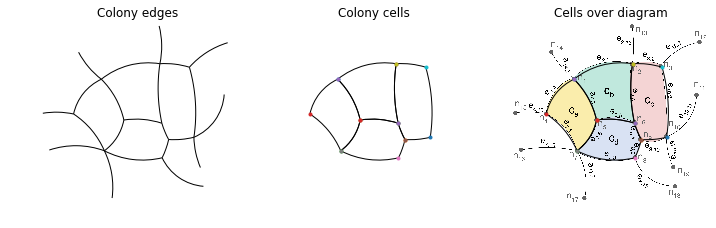

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

## All edges
axes[0].set_title("Colony edges")
for edge in edges:
    edge.plot(axes[0])

## Just the cells
axes[1].set_title("Colony cells")
for cell in cells:
    cell.plot(axes[1])

## With original image
axes[2].set_title("Cells over diagram")
img = plt.matplotlib.image.imread('img/cell_vertex_graph.png')
axes[2].imshow(img)
for cell in cells:
    cell.plot(axes[2])

## Formatting   
for ax in axes:
    ax.set(xlim=(0,img.shape[1]), ylim=(img.shape[0], 0), aspect=1)
    ax.axis('off')

Looks like the data structures are working and we've roughly replicated our toy colony. Now lets instantiate a copy of this colony comprising our list of cells, edges and nodes:

In [4]:
this_colony = colony(cells, edges, nodes)

We can call the *calculate_tension* method of the colony class to compute tensions for this set of edges

In [5]:
tensions, _, _ = this_colony.calculate_tension(solver='DLITE')

guess tension is [0.47, 0.26, 0.34, 0.94, 0.09, 0.95, 0.27, 0.31, 0.4, 0.71, 0.16, 0.93, 0.82, 0.64, 0.99, 0.44, 0.91, 0.69, 0.98, 0.83, 0.23, 0.1]
Function value 0.0003815908656275095
Solution [0.31873733 0.20256112 0.21409355 0.87594647 0.31760438 0.95481444
 0.08635246 0.26699764 0.28846629 0.67278507 1.00115104 0.85768281
 0.68604334 0.95544008 0.81685875 0.12975183 0.89840823 0.26631104
 0.65384086 0.38139466 0.673085   1.0506148 ]


-----------------------------


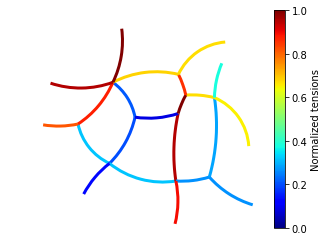

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

this_colony.plot_tensions(ax, 
                          fig, 
                          tensions, 
                          min_x=0, max_x=2300, 
                          min_y=0, max_y=2300, 
                          min_ten = 0, max_ten = 1, 
                          specify_color = 'jet', cbar = 'no', lw = 3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cl = plt.colorbar(sm, ax=ax)
cl.set_label('Normalized tensions')
ax.axis('off');

There's our predicted tension! 